# Data extract and transform

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Add a column for the age when the house is sold
df['age']=df['YrSold']-df['YearBuilt']

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Select the continuous columns
continuous_columns=['LotFrontage', 'LotArea', 
       'MasVnrArea', 'BsmtFinSF1',
   'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea',  'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd',  'Fireplaces',
       'GarageCars', 'GarageArea',  'age','SalePrice']

In [8]:
numeric_houses=df[continuous_columns]

In [9]:
numeric_houses.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,age,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,3,1,8,0,2,548,5,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,3,1,6,1,2,460,31,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,3,1,6,1,2,608,7,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,3,1,7,1,3,642,91,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,4,1,9,1,3,836,8,250000


In [10]:
# Exclude the relevant columns
# "TotalBsmtSF"="BsmtFinSF1"+"BsmtFinSF2"+"BsmtUnfSF"
# GrLivArea=1stFirSF+2ndFirSF

columns_to_drop=['TotalBsmtSF','GrLivArea']
conti_houses=numeric_houses.drop(columns=columns_to_drop)

In [11]:
conti_houses.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,age,SalePrice
0,65.0,8450,196.0,706,0,150,856,854,0,3,1,8,0,2,548,5,208500
1,80.0,9600,0.0,978,0,284,1262,0,0,3,1,6,1,2,460,31,181500
2,68.0,11250,162.0,486,0,434,920,866,0,3,1,6,1,2,608,7,223500
3,60.0,9550,0.0,216,0,540,961,756,0,3,1,7,1,3,642,91,140000
4,84.0,14260,350.0,655,0,490,1145,1053,0,4,1,9,1,3,836,8,250000


In [12]:
conti_houses.info()

# "LotFrontage" and "MasVnrArea" have null vaues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   MasVnrArea    1452 non-null   float64
 3   BsmtFinSF1    1460 non-null   int64  
 4   BsmtFinSF2    1460 non-null   int64  
 5   BsmtUnfSF     1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   2ndFlrSF      1460 non-null   int64  
 8   LowQualFinSF  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  KitchenAbvGr  1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageCars    1460 non-null   int64  
 14  GarageArea    1460 non-null   int64  
 15  age           1460 non-null   int64  
 16  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 194.0 KB


In [13]:
# Delete the rows with null value
no_null_houses=conti_houses.dropna()

In [14]:
no_null_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1195 non-null   float64
 1   LotArea       1195 non-null   int64  
 2   MasVnrArea    1195 non-null   float64
 3   BsmtFinSF1    1195 non-null   int64  
 4   BsmtFinSF2    1195 non-null   int64  
 5   BsmtUnfSF     1195 non-null   int64  
 6   1stFlrSF      1195 non-null   int64  
 7   2ndFlrSF      1195 non-null   int64  
 8   LowQualFinSF  1195 non-null   int64  
 9   BedroomAbvGr  1195 non-null   int64  
 10  KitchenAbvGr  1195 non-null   int64  
 11  TotRmsAbvGrd  1195 non-null   int64  
 12  Fireplaces    1195 non-null   int64  
 13  GarageCars    1195 non-null   int64  
 14  GarageArea    1195 non-null   int64  
 15  age           1195 non-null   int64  
 16  SalePrice     1195 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 168.0 KB


# Create models to find the best model
## Univariate model - use one column as feature and compare the performances

In [15]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def knn_train_test(feature,target,df):
    knn=KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize the DF row index
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    # Split df to train and test
    last_train_row=int(len(rand_df)/2)
    
    train=rand_df.iloc[0:last_train_row]
    test=rand_df.iloc[last_train_row:]
    
    knn.fit(train[[feature]],train[target])
    
    # Make predictions using model
    predicted_labels=knn.predict(test[[feature]])
    
    # Calculate MSE and RMSE
    mse=mean_squared_error(test[target],predicted_labels)
    rmse=np.sqrt(mse)
    return rmse

rmse_results={}
feature=no_null_houses.columns.drop('SalePrice')

for col in feature:
    rmse_val=knn_train_test(col,'SalePrice',no_null_houses)
    rmse_results[col]=rmse_val
    
# Create dic to see the results
rmse_results_series=pd.Series(rmse_results)
rmse_results_series.sort_values()

GarageCars       60570.139970
age              62100.807529
GarageArea       63224.819846
1stFlrSF         64614.232555
TotRmsAbvGrd     68669.773862
LotArea          71813.248374
2ndFlrSF         72378.151910
MasVnrArea       74364.208050
LotFrontage      75124.484002
Fireplaces       76818.930529
BsmtFinSF1       78305.325388
KitchenAbvGr     79076.071482
BedroomAbvGr     79649.127521
BsmtUnfSF        80719.054339
BsmtFinSF2       90167.621143
LowQualFinSF    108454.176256
dtype: float64

### From the results, it is noted that "GarageCars" performs best to predict the house price.

## Modify the function to accept a parameter for k value

In [16]:
def knn_train_test(feature,target,df):
    
    np.random.seed(1)
    
    # Randomize the DF row index
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    # Split df to train and test
    last_train_row=int(len(rand_df)/2)
    
    train=rand_df.iloc[0:last_train_row]
    test=rand_df.iloc[last_train_row:]
    
    k_values=[1,3,5,7,9]
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[feature]],train[target])

        # Make predictions using model
        predicted_labels=knn.predict(test[[feature]])

        # Calculate MSE and RMSE
        mse=mean_squared_error(test[target],predicted_labels)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse
    return k_rmses

k_rmse_results={}
feature=no_null_houses.columns.drop('SalePrice')

for col in feature:
    rmse_val=knn_train_test(col,'SalePrice',no_null_houses)
    k_rmse_results[col]=rmse_val
    

k_rmse_results


{'LotFrontage': {1: 94436.91872287678,
  3: 76774.25802418939,
  5: 75124.48400150852,
  7: 72850.74742897057,
  9: 70978.20637319123},
 'LotArea': {1: 89739.46679387968,
  3: 75570.70191883731,
  5: 71813.24837423943,
  7: 71309.25588018971,
  9: 70643.79709504277},
 'MasVnrArea': {1: 92229.44595959241,
  3: 78225.17864603689,
  5: 74364.2080504614,
  7: 74636.24185759982,
  9: 71737.22027550692},
 'BsmtFinSF1': {1: 111453.1213087887,
  3: 77643.07931714205,
  5: 78305.32538805324,
  7: 77095.00528459979,
  9: 74888.89681384453},
 'BsmtFinSF2': {1: 78318.29997054276,
  3: 78506.54764024702,
  5: 90167.62114268125,
  7: 83092.99884387759,
  9: 79382.8866306141},
 'BsmtUnfSF': {1: 104606.19926403288,
  3: 84221.76733050482,
  5: 80719.05433873674,
  7: 80196.63323726192,
  9: 77881.46471676408},
 '1stFlrSF': {1: 81859.04887748873,
  3: 69153.0959570019,
  5: 64614.232555278606,
  7: 61365.83827587601,
  9: 60272.68172312301},
 '2ndFlrSF': {1: 114489.41209466025,
  3: 72134.33834811597,


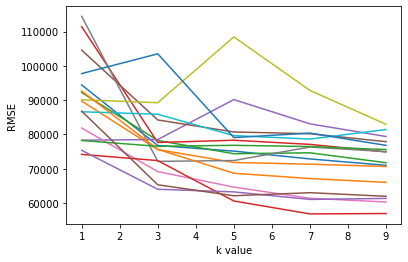

In [17]:
# Visualize the results with lines
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x=list(v.keys())
    y=list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate model

In [18]:
# Calculate the average RMSE values across different 'k' for each feature

feature_mean_rmse={}

for k,v in k_rmse_results.items():
    avg_rmse=np.mean(list(v.values()))
    feature_mean_rmse[k]=avg_rmse
    
series_mean_rmse=pd.Series(feature_mean_rmse)
sorted_series_mean_rmse=series_mean_rmse.sort_values()

print(sorted_series_mean_rmse)

sorted_features=sorted_series_mean_rmse.index

GarageCars      64165.220216
GarageArea      64985.175878
1stFlrSF        67452.979478
age             67826.064793
TotRmsAbvGrd    74022.889566
LotArea         75815.294012
Fireplaces      76720.503803
LotFrontage     78032.922910
MasVnrArea      78238.458958
BsmtFinSF2      81893.670846
2ndFlrSF        82060.684135
BedroomAbvGr    82444.480447
BsmtFinSF1      83877.085622
BsmtUnfSF       85525.023777
KitchenAbvGr    87509.006433
LowQualFinSF    92724.034331
dtype: float64


In [29]:
def knn_train_test(feature,target,df):
   
    np.random.seed(1)
    
    # Randomize the DF row index
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    # Split df to train and test
    last_train_row=int(len(rand_df)/2)
    
    train=rand_df.iloc[0:last_train_row]
    test=rand_df.iloc[last_train_row:]
    
    k_values=[5]
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
    
        knn.fit(train[feature],train[target])
    
        # Make predictions using model
        predicted_labels=knn.predict(test[feature])

        # Calculate MSE and RMSE
        mse=mean_squared_error(test[target],predicted_labels)
        rmse=np.sqrt(mse)
        
        k_rmses[k]=rmse
        
    return k_rmses

k_rmse_results={}


for n_best_feature in range (2,7):
    k_rmse_results['{} best features'.format(n_best_feature)]=knn_train_test(sorted_features[:n_best_feature],'SalePrice',no_null_houses)

k_rmse_results

{'2 best features': {5: 61922.186851931765},
 '3 best features': {5: 55108.50702181996},
 '4 best features': {5: 51594.617028303684},
 '5 best features': {5: 51590.770569643224},
 '6 best features': {5: 52742.0618025818}}

It is noted from last output that the following three features gave a best performing result:
- GarageCars     
- GarageArea      
- 1stFlrSF 

## Hyperparameter tuning

In [31]:
def knn_train_test(feature,target,df):
   
    np.random.seed(1)
    
    # Randomize the DF row index
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    # Split df to train and test
    last_train_row=int(len(rand_df)/2)
    
    train=rand_df.iloc[0:last_train_row]
    test=rand_df.iloc[last_train_row:]
    
    k_values=[5]
    k_rmses={}
    
    k_values=[i for i in range(1,25)]
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
    
        knn.fit(train[feature],train[target])
    
        # Make predictions using model
        predicted_labels=knn.predict(test[feature])

        # Calculate MSE and RMSE
        mse=mean_squared_error(test[target],predicted_labels)
        rmse=np.sqrt(mse)
        
        k_rmses[k]=rmse
        
    return k_rmses

k_rmse_results={}


for n_best_feature in range (2,6):
    k_rmse_results['{} best features'.format(n_best_feature)]=knn_train_test(sorted_features[:n_best_feature],'SalePrice',no_null_houses)

k_rmse_results

{'2 best features': {1: 75442.99608437679,
  2: 64424.36434720152,
  3: 63238.00890570076,
  4: 65276.09210330902,
  5: 61922.186851931765,
  6: 60647.44408732608,
  7: 60987.64611112755,
  8: 61554.48847566719,
  9: 60720.88072746531,
  10: 61250.20166901207,
  11: 60698.9339520552,
  12: 59886.85575523678,
  13: 59604.54837400714,
  14: 59964.26185923799,
  15: 59457.35473170843,
  16: 59645.5749953662,
  17: 60131.859536078395,
  18: 60081.94509226044,
  19: 60105.202180597356,
  20: 59810.785153085606,
  21: 59989.49665280257,
  22: 59606.73195112504,
  23: 59354.42907959736,
  24: 59066.649247155256},
 '3 best features': {1: 68151.32699097235,
  2: 61705.12478547103,
  3: 61008.71485056674,
  4: 57774.45031182475,
  5: 55108.50702181996,
  6: 53423.1652578565,
  7: 52452.40913567462,
  8: 52468.34872317924,
  9: 51896.813300146365,
  10: 51188.4061916448,
  11: 50850.117115229295,
  12: 50475.994398524774,
  13: 50472.92110855173,
  14: 50483.14513248391,
  15: 50135.491619188775,

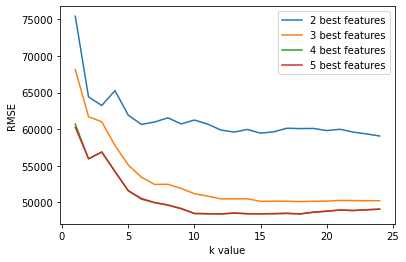

In [33]:
for k,v in k_rmse_results.items():
    x=list(v.keys())
    y=list(v.values())
    plt.plot(x,y,label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

The plot shows that the lowest RMSE is with 5 features, with 12 as k value.